# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [53]:
# Your code here. 
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [34]:
Age =[17,51,27,21,36,48,19,26,54,30]
Tardies=[10,1,5,9,4,2,9,6,0,3]
  
student_data = pd.DataFrame(list(zip(Age, Tardies)), 
               columns =['Age', 'Tardies']) 

In [35]:
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

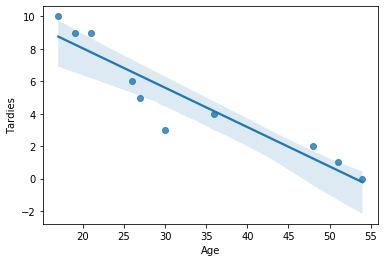

In [36]:
# Your code here.
sns.regplot('Age','Tardies',student_data)

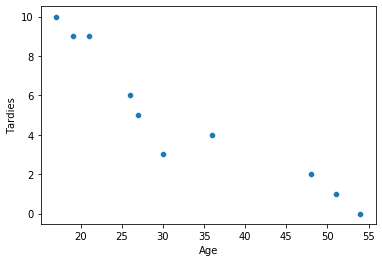

In [45]:
sns.scatterplot(data=student_data, x='Age',y="Tardies")

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [37]:
# Your response here. 
#There is a negative correlation between age and number of tardies. Meaning the older the student the less number of tardies they have, while the younger the student the higher number of tardies.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [42]:
# Your response here.
student_data.corr()

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


In [41]:
student_data.cov()

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


In [44]:
#“Covariance” indicates the direction of the linear relationship between variables. “Correlation” on the other hand measures both the strength and direction of the linear relationship between two variables. Correlation is a function of the covariance.
#In this case the correlation shows that there is a strong (almost close to 1) negative correlation between the 2 variables, meaning 1 increases as the other decreases. 

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [47]:
# Your response here.
#Outcome variable is the Tardies
#Will use Linear Regression
X = student_data['Age']
Y = student_data['Tardies']

In [48]:
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)

In [49]:
print('The slope is, b1: ' + str(slope))
print('The intercept is, b0: ' + str(intercept))

The slope is, b1: -0.2428207709159808
The intercept is, b0: 12.888803363135768


In [51]:
#The model is the following:
#Tardies=12.88+(-0.24)Age

In [73]:
X = student_data['Age']
Y = student_data['Tardies']
X = sm.add_constant(X)
model = sm.OLS(Y,X) 
results = model.fit()
predictions = results.predict(X)
compare = pd.DataFrame({'Actual':Y, 'predicted':predictions})
compare.head(10)

C:\Users\Merti\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,Actual,predicted
0,10,8.760850
1,1,0.504944
2,5,6.332643
3,9,7.789567
4,4,4.147256
5,2,1.233406
6,9,8.275209
7,6,6.575463
8,0,-0.223518
9,3,5.604180


In [62]:

print('The r-squared score of our model is:', r2_score(Y, predictions))

The r-squared score of our model is: 0.8820265558250109


Plot your regression model on your scatter plot.

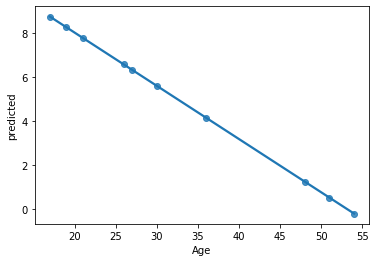

In [66]:
# Your code here.
student_data["predicted"] = predictions
sns.regplot(data=student_data, x='Age',y="predicted")
#paolo: yes- advice is to plot both model and data on the same plot
# to check visually how model performs

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [1]:
# Your response here. 
#Based on the Rsquared score of 0.88, the model is pretty accurate and could be used to come up with quite correct predictions of tardies based on age.
#Yes based on the data we have we can say age is a good predictor of tardiness

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set that you can download from [here](https://drive.google.com/file/d/1EyAN0RXmAM5OLzKcxyWqdExQJ3KiswO9/view?usp=sharing). Please place the data it in the provided data folder for this lab. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [2]:
# Import any libraries you may need 
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [3]:
# Import the data
vehicles=pd.read_csv('../data/vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [4]:
# Your response here. 
vehicles_data=vehicles[['Year','Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year','CO2 Emission Grams/Mile']]
vehicles_data.head()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
0,1984,4.0,19.388824,17,1950,522.764706
1,1984,6.0,25.354615,13,2550,683.615385
2,1985,4.0,20.600625,16,2100,555.437500
3,1985,6.0,25.354615,13,2550,683.615385
4,1987,6.0,20.600625,16,2550,555.437500


In [5]:
vehicles_data.corr()
#The most highly correlated variable seems to be Fuel Barrels/Year, with 0.98 positive correlation. 
#The least amount of helpful information for determining CO2 emissions seems to be the Year, which has a weak negative -0.22 correlation.

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [6]:
# Your response here. 
X = vehicles_data['Fuel Barrels/Year']
Y = vehicles_data['CO2 Emission Grams/Mile']
X = sm.add_constant(X)
model = sm.OLS(Y,X) 
results = model.fit()
predictions = results.predict(X)
compare = pd.DataFrame({'Actual':Y, 'predicted':predictions})
compare.head(10)

,Actual,predicted
0,522.764706,522.095095
1,683.615385,678.897734
2,555.437500,553.945631
3,683.615385,678.897734
4,555.437500,553.945631
5,403.954545,406.274965
6,370.291667,373.459261
7,444.350000,445.653809
8,403.954545,406.274965
9,370.291667,373.459261


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [7]:
results.summary() 
#Rsquared and adjusted R squared scores are quite high (0.973), meaning we can trust the model to be quite accurate

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.973
Model:                                 OLS   Adj. R-squared:                  0.973
Method:                      Least Squares   F-statistic:                 1.275e+06
Date:                     Thu, 05 Nov 2020   Prob (F-statistic):               0.00
Time:                             11:54:50   Log-Likelihood:            -1.5821e+05
No. Observations:                    35952   AIC:                         3.164e+05
Df Residuals:                        35950   BIC:                         3.164e+05
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                12.4865      0.423     29.523      0.000      11.658      13.316
Fuel Barrels/Year    26.2836      0.023   1128.967      0.000      26.238      26.329
==============================================================================
Omnibus:                    88540.411   Durbin-Watson:                   0.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        957228555.960
Skew:                          26.696   Prob(JB):                         0.00
Kurtosis:                     800.592   Cond. No.                         74.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:xlabel='CO2 Emission Grams/Mile', ylabel='predicted'>

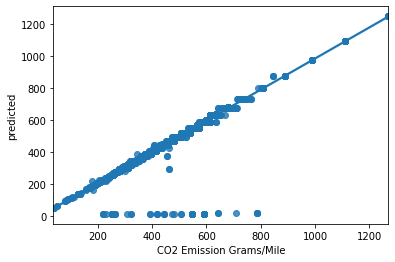

In [8]:
# Your response here. 
vehicles_data["predicted"] = predictions
sns.regplot(data=vehicles_data, x='CO2 Emission Grams/Mile',y="predicted")

In [9]:
#Also based on the visualization we see the model fits quite well, with the few exceptions of a few outliers who do not seem to fit the linear model of the rest of the data
#paolo: good visualization - idea!Consider also plotting the difference between
# actual and predicted values

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [ ]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [ ]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [ ]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [ ]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 